In [269]:
import serial
import binascii
import numpy as np
from matplotlib import pyplot as plt

In [271]:
ser = serial.Serial('COM4', 115200, parity=serial.PARITY_EVEN)

SerialException: could not open port 'COM4': PermissionError(13, 'Access is denied.', None, 5)

In [177]:
with open('hexdatafile.dat', 'wb') as datafile:
    datafile.write(ser.read(1000000))

In [ ]:
# try it again with an infinite loop we break
f_out = open("hexdatafile.dat", "wb")
while True:
    if (ser.in_waiting > 0):
        #print(ser.in_waiting)
        f_out.write(ser.read(ser.in_waiting))


In [272]:
f_out.close()
ser.close()

In [262]:
# lets see about processing the file
with open('hexdatafile.dat', 'rb') as f:
    hexdata = f.read().hex()

In [263]:
len(hexdata)

802466

In [264]:
temp_samp = "0x" + hexdata[0:2]
temp_samp
int(temp_samp,16)

136

In [265]:
iq_pairs = len(hexdata)/4
samples_i = np.zeros(int(iq_pairs))
samples_q = np.zeros(int(iq_pairs))
test_vector = np.arange(int(iq_pairs))

In [266]:
for x in test_vector:
    samples_i[x] = int("0x" + hexdata[x*4:x*4+2], 16)
    if (samples_i[x] > 127):
        samples_i[x] = samples_i[x] - 256
    samples_q[x] = int("0x" + hexdata[x*4+2:x*4+4], 16)
    if (samples_q[x] > 127):
        samples_q[x] = samples_q[x] - 256

In [267]:
samples_q[0:10]

array([-110.,   -8.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.])

Text(0,0.5,'Time')

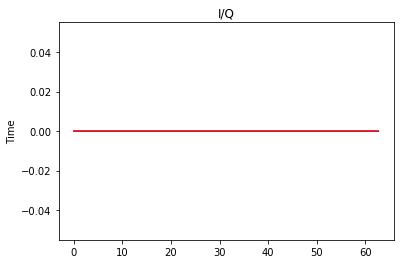

In [268]:
%matplotlib inline
freq_axis_time = np.arange(len(samples_i))*1/3200
plt.plot(freq_axis_time[3:], samples_i[3:])
plt.plot(freq_axis_time[3:], samples_q[3:],'r')
plt.title('I/Q')
plt.ylabel('Time')

In [219]:
np.savetxt('samples_i_int.txt', samples_i, fmt="%d")
np.savetxt('samples_q_int.txt', samples_q, fmt="%d")